In [1]:
from tilepy.include.ObservationScheduler import getdate, GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os


/opt/miniconda3/envs/tilepyenv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
# Type of followup, options: gbm, gbmpng, nucascade, gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
#skymap = 'https://gracedb.ligo.org/api/superevents/S240624cd/files/cwb.multiorder.fits,1'
skymap = 'https://gracedb.ligo.org/api/superevents/S240904bv/files/cwb.multiorder.fits,0'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
# NOTE: to have a scheduler for the CWB case, you need to have a config with low cuts on the probability per pointing
cfgFile = '../config/FollowupParameters_CTAON.ini'

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

In [55]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [56]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile,alertType,locCut)
obspar.from_configfile(cfgFile)

In [57]:
# Run the scheduler
from tilepy.include.PointingTools import GetSkymap
from astropy.io import fits
import healpy as hp
import ligo.skymap.io.fits as lf
fitsfile = fits.open(skymap)


it is a url
The filename is  cwb.multiorder.fits,0
curl https://gracedb.ligo.org/api/superevents/S240904bv/files/cwb.multiorder.fits,0 -o cwb.multiorder.fits,0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  213k  100  213k    0     0   112k      0  0:00:01  0:00:01 --:--:--  112k


Is the hotspot in the galactic plane? False
Reducing HRnside to the value from the original map: NSIDE= 64
Starting the 2D pointing calculation with the following parameters

Filename:  S240904bv
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/S240904bv

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-N
Observatory: 28.75 deg
Observatory: -17.5 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.0
Max runs: 20
Duration: 15
High Resolution NSIDE: 64
Low Resolution NSIDE: 64
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

Loading map from  cwb.multiorder.fits,0
Loading HEALPix map from file: cwb.multiorder.fits,0
----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.056 Number of runs that fulfill darkness condition  : 16 Number of ef

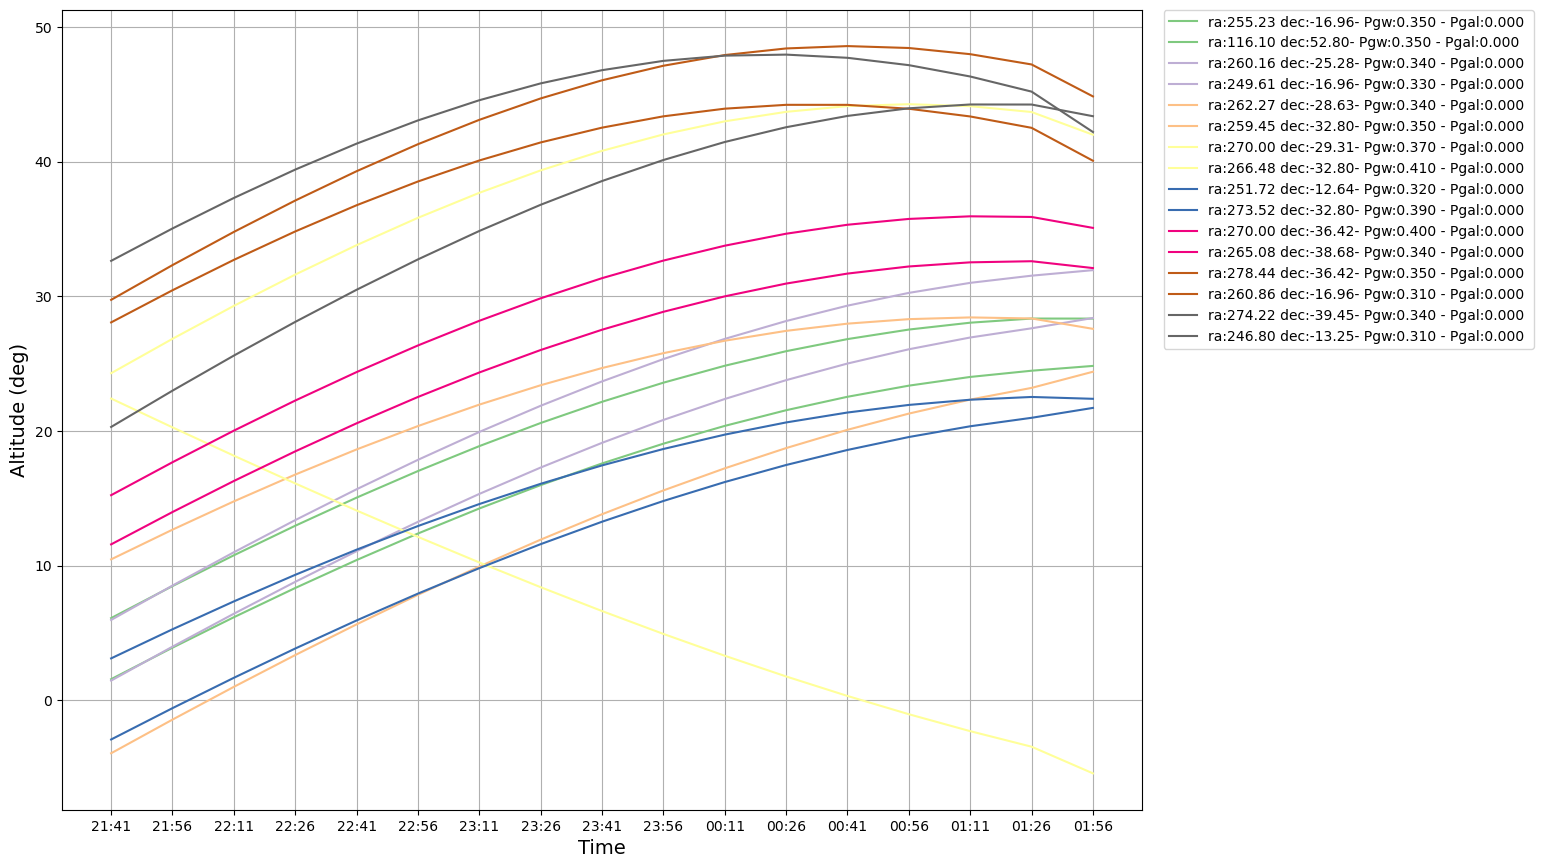

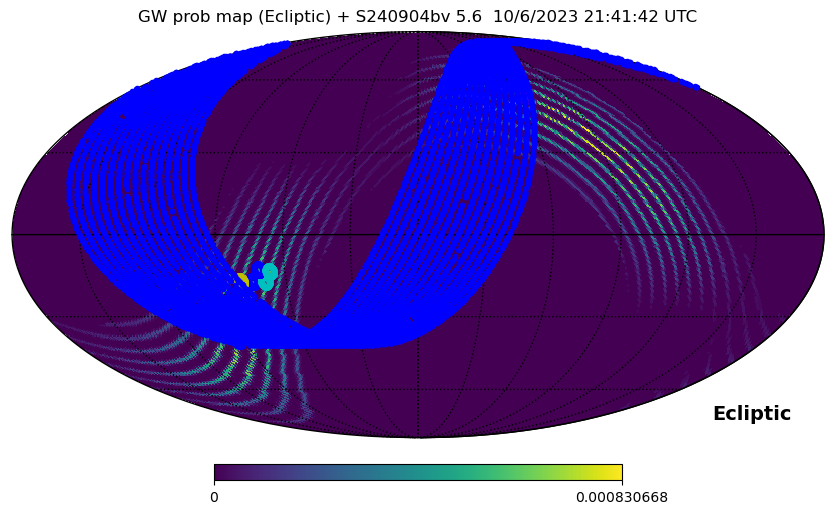

In [58]:
# Run the scheduler
GetSchedule(obspar)